In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data

In [2]:
X = np.linspace(0, 10, 200).reshape(-1, 1).astype(np.float32)      # Inputs: 0 to 10
y = 7 * X + 5 + np.random.randn(*X.shape) * 2                      # Targets: linear + noise

# Define a learning rate scheduler function

In [3]:
def scheduler(epoch, lr):
    if epoch % 20 == 0 and epoch:
        return lr * 0.5                                            # Halve learning rate every 20 epochs
    return lr

# Create a simple regression model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])               # Single neuron linear regressor
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile with Adam optimizer and MSE loss

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Use the scheduler as a callback

In [6]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model with scheduler

In [7]:
history = model.fit(X, y, epochs=100, callbacks=[lr_callback], verbose=0)

# Predict and visualize results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


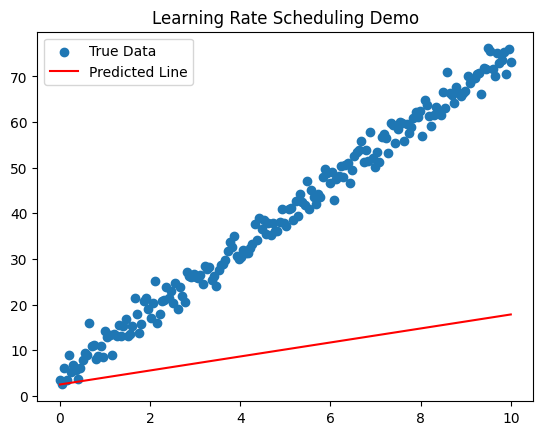

In [8]:
preds = model.predict(X)
 
plt.scatter(X, y, label='True Data')                               # Original noisy data
plt.plot(X, preds, color='red', label='Predicted Line')            # Regression line
plt.title("Learning Rate Scheduling Demo")
plt.legend()
plt.show()

# Plot learning rate change over epochs

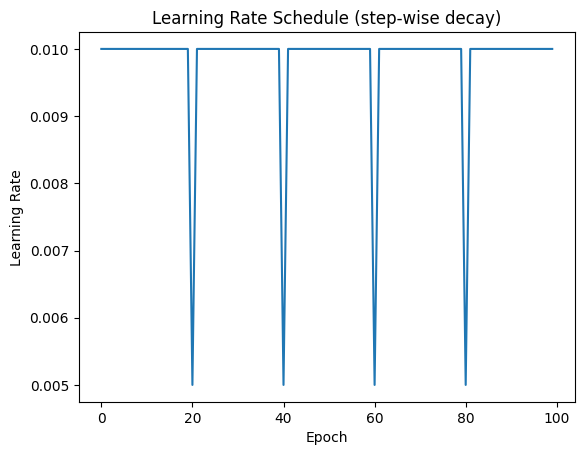

In [9]:
lrs = [scheduler(e, 0.01) for e in range(100)]
plt.plot(lrs)
plt.title("Learning Rate Schedule (step-wise decay)")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()